In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/train_dir'
valid_path = '/content/drive/My Drive/base_dir/val_dir'
test_path = '/content/drive/My Drive/base_dir/val_dir'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/train_dir/*')

In [8]:
len(folders)

7

In [9]:

# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/train_dir',
                                                 target_size = (224, 224),
                                                 batch_size = 400,
                                                 class_mode = 'categorical')


Found 8360 images belonging to 7 classes.


In [15]:
# Note: shuffle=False causes the test dataset to not be shuffled
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/base_dir/val_dir',
                                            target_size = (224, 224),
                                            batch_size = 50,shuffle=False)



Found 1658 images belonging to 7 classes.


In [16]:
val_set = test_datagen.flow_from_directory('/content/drive/My Drive/base_dir/val_dir',
                                            target_size = (224, 224),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 1658 images belonging to 7 classes.


In [17]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
21/21 [==============================] - 3676s 175s/step - loss: 10.8653 - accuracy: 0.5002 - val_loss: 1.7697 - val_accuracy: 0.8160
Epoch 2/20
21/21 [==============================] - 1136s 54s/step - loss: 2.9109 - accuracy: 0.6498 - val_loss: 0.9616 - val_accuracy: 0.8257
Epoch 3/20
21/21 [==============================] - 1135s 54s/step - loss: 1.2188 - accuracy: 0.7032 - val_loss: 0.5791 - val_accuracy: 0.8390
Epoch 4/20
21/21 [==============================] - 1138s 54s/step - loss: 0.7880 - accuracy: 0.7447 - val_loss: 0.6013 - val_accuracy: 0.8130
Epoch 5/20
21/21 [==============================] - 1132s 54s/step - loss: 0.7439 - accuracy: 0.7404 - val_loss: 0.5372 - val_accuracy: 0.8456
Epoch 6/20
21/21 [==============================] - 1134s 54s/step - loss: 0.7239 - accuracy: 0.7566 - val_loss: 0.5348 - val_accuracy: 0.8311
Epoch 7/20
21/21 [==============================] - 1138s 54s/st

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

In [19]:
from keras.models import load_model
model = load_model('model_inceptionv3.h5')

In [20]:
from google.colab import files
files.download('model_inceptionv3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import matplotlib.pyplot as plt

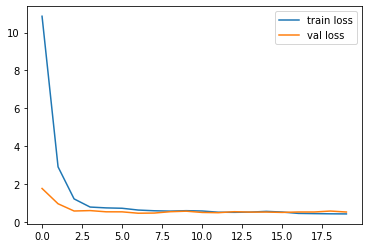

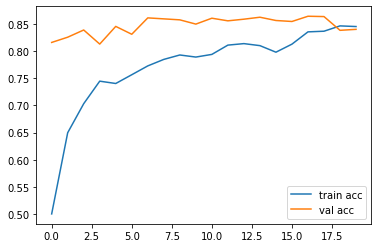

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
y_pred = model.predict(test_set)

In [26]:
y_pred

array([[7.8948945e-02, 9.5142186e-02, 7.8784567e-01, ..., 1.0292715e-02,
        2.7461588e-02, 9.5304913e-06],
       [8.1253406e-03, 1.2462378e-02, 6.4254701e-02, ..., 2.0471020e-02,
        8.9468551e-01, 5.5943143e-09],
       [8.3014062e-03, 5.6367200e-02, 9.3640722e-02, ..., 7.3833746e-01,
        2.8108213e-02, 4.9185794e-05],
       ...,
       [2.1563508e-08, 3.1710606e-08, 6.8803341e-04, ..., 3.5029746e-08,
        1.8745550e-06, 9.9931002e-01],
       [2.5564304e-06, 1.6302685e-06, 1.3582644e-02, ..., 2.8048248e-03,
        9.8360783e-01, 4.5973397e-07],
       [4.1870081e-09, 5.7006421e-08, 1.1196898e-04, ..., 3.4323434e-04,
        1.5957270e-02, 9.8358744e-01]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([2, 5, 4, ..., 6, 5, 6])

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_inceptionv3.h5')

In [31]:
img=image.load_img('/content/drive/My Drive/Test_set/actinic keratosis/ISIC_0025780.jpg',target_size=(224,224))

In [32]:
x=image.img_to_array(img)
x

array([[[134.,  77.,  84.],
        [138.,  79.,  85.],
        [140.,  81.,  87.],
        ...,
        [162., 140., 127.],
        [161., 137., 127.],
        [162., 137., 130.]],

       [[140.,  80.,  88.],
        [136.,  76.,  86.],
        [139.,  79.,  87.],
        ...,
        [161., 138., 132.],
        [160., 135., 128.],
        [161., 136., 129.]],

       [[142.,  82.,  90.],
        [136.,  80.,  89.],
        [139.,  77.,  88.],
        ...,
        [164., 141., 135.],
        [163., 138., 131.],
        [164., 139., 132.]],

       ...,

       [[165., 124., 128.],
        [164., 115., 121.],
        [161., 116., 121.],
        ...,
        [168., 120., 120.],
        [169., 119., 120.],
        [169., 121., 121.]],

       [[163., 116., 122.],
        [161., 110., 117.],
        [157., 110., 116.],
        ...,
        [168., 120., 120.],
        [171., 121., 124.],
        [168., 119., 122.]],

       [[162., 113., 116.],
        [157., 104., 110.],
        [157., 1

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[0.0938614 , 0.0080853 , 0.12681262, 0.06605531, 0.01852585,
        0.66850454, 0.01815502]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)
a==1

array([False])

In [37]:
# Get the labels of the test images.

test_labels = test_set.classes

In [38]:
test_labels # We need these to plot the confusion matrix.

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [39]:
# Print the label associated with each class
test_set.class_indices

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [40]:
# make a prediction
predictions = model.predict_generator(test_set, steps=1658, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
  34/1658 [..............................] - 187s 5s/step


In [41]:
predictions.shape

(1658, 7)

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
test_labels.shape

(1658,)

In [46]:
len(predictions.argmax(axis=1))

1658

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
 # argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [50]:
test_set.class_indices


{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Confusion matrix, without normalization
[[  12    4   13    1   11    4    0]
 [   6   19   12    1    8    6    1]
 [   7    1   70    3   17   34    0]
 [   0    0    4    3    0    5    0]
 [   5    1   11    0   37   15    0]
 [   4    2   44    1   35 1241    1]
 [   0    0    0    0    0    8   11]]


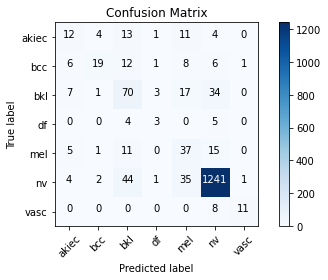

In [53]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

Generating the Classification report

In [54]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_set.classes

In [55]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.35      0.27      0.30        45
         bcc       0.70      0.36      0.48        53
         bkl       0.45      0.53      0.49       132
          df       0.33      0.25      0.29        12
         mel       0.34      0.54      0.42        69
          nv       0.95      0.93      0.94      1328
        vasc       0.85      0.58      0.69        19

    accuracy                           0.84      1658
   macro avg       0.57      0.49      0.51      1658
weighted avg       0.85      0.84      0.84      1658



Recall = Given a class, will the classifier be able to detect it?
Precision = Given a class prediction from a classifier, how likely is it to be correct?
F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.